# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1010]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [1011]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [1012]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [1013]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [1014]:
# Convert categorical features to category type

cat_vars = ['store_primary_category', 'order_protocol', 'market_id']
df[cat_vars] = df[cat_vars].astype('category')

In [1015]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [1016]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken'] = df['time_taken'].dt.total_seconds() / 60
df['time_taken'].dtype

dtype('float64')

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [1017]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = pd.to_datetime(df['created_at']).dt.hour
df['created_day'] = pd.to_datetime(df['created_at']).dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_day'].apply(
    lambda x: 'yes' if x > 4 else 'no'
)
df['isWeekend'] = df['isWeekend'].astype('category')

In [1018]:
df = df[df['total_busy_dashers'] <= df['total_onshift_dashers']]

In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136487 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 136487 non-null  category      
 1   created_at                136487 non-null  datetime64[ns]
 2   actual_delivery_time      136487 non-null  datetime64[ns]
 3   store_primary_category    136487 non-null  category      
 4   order_protocol            136487 non-null  category      
 5   total_items               136487 non-null  int64         
 6   subtotal                  136487 non-null  int64         
 7   num_distinct_items        136487 non-null  int64         
 8   min_item_price            136487 non-null  int64         
 9   max_item_price            136487 non-null  int64         
 10  total_onshift_dashers     136487 non-null  float64       
 11  total_busy_dashers        136487 non-null  float64       
 12  total_o

In [1020]:
df.head(2)

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
2            3.0            4      4771                   3             820   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
2            1604                    8.0                 6.0   

   total_outstanding_orders  distance  time_taken  created_hour  created_day  \
0                      21.0     34.44        47.0            22            4   
2                      18.0     11.56        55.0             0            0   

  isWeekend  
0        no  
2        no

In [1021]:
df['store_primary_category'].value_counts().tail(40).sum()

5051

In [1022]:
least_cats = df['store_primary_category'].value_counts().nsmallest(40).index
print(least_cats)

## We are assigning 101, as a new category 'Others'
df['store_primary_category'] = df['store_primary_category'].apply(
    lambda x: 101 if x in least_cats else x
)

print(df['store_primary_category'].value_counts())
df['store_primary_category'] = df['store_primary_category'].astype('category')

CategoricalIndex([ 3, 21,  8, 43, 56,  1, 19, 48, 64, 27, 33, 22, 60, 63, 41,
                  37, 62, 32,  5, 44,  0, 26, 11, 67, 51, 31, 54, 70, 69, 17,
                   9, 49, 29, 16, 23, 12, 42, 30, 53, 52],
                 categories=[0, 1, 2, 3, ..., 69, 70, 71, 72], ordered=False, dtype='category', name='store_primary_category')
store_primary_category
4      13911
55     11989
46     11792
13      7712
58      7118
20      6900
39      6375
24      6030
38      5221
101     5051
28      5033
36      4916
68      4853
72      4412
45      3982
10      3827
50      2902
57      2766
34      2349
59      2042
7       2021
6       1726
66      1659
15      1649
40      1381
2       1370
18      1247
61      1244
47      1171
35      1126
65       827
25       794
71       577
14       514
Name: count, dtype: int64


In [1023]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
time_taken                  0
created_hour                0
created_day                 0
isWeekend                   0
dtype: int64

In [1024]:
df.drop(['min_item_price', 'max_item_price'], axis=1, inplace=True)

In [1025]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'created_hour',
       'created_day', 'isWeekend'],
      dtype='object')

In [1026]:
df.select_dtypes(include=['category']).columns.tolist()

['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

In [1027]:
df_dummies = pd.get_dummies(
    df, 
    columns=['store_primary_category', 'order_protocol', 'market_id', 'isWeekend'], 
    prefix=['store_cat', 'ord_pro', 'mark_id', 'is_weekend'], 
    dtype='int', 
    drop_first=True,
)

In [1028]:
print(df_dummies.columns)
print("----------------------")
print(df_dummies.shape)
print(df.shape)

Index(['created_at', 'actual_delivery_time', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'created_hour',
       'created_day', 'store_cat_4', 'store_cat_6', 'store_cat_7',
       'store_cat_10', 'store_cat_13', 'store_cat_14', 'store_cat_15',
       'store_cat_18', 'store_cat_20', 'store_cat_24', 'store_cat_25',
       'store_cat_28', 'store_cat_34', 'store_cat_35', 'store_cat_36',
       'store_cat_38', 'store_cat_39', 'store_cat_40', 'store_cat_45',
       'store_cat_46', 'store_cat_47', 'store_cat_50', 'store_cat_55',
       'store_cat_57', 'store_cat_58', 'store_cat_59', 'store_cat_61',
       'store_cat_65', 'store_cat_66', 'store_cat_68', 'store_cat_71',
       'store_cat_72', 'store_cat_101', 'ord_pro_2.0', 'ord_pro_3.0',
       'ord_pro_4.0', 'ord_pro_5.0', 'ord_pro_6.0', 'ord_pro_7.0',
       'mark_id_2.0', 'mark_id_3.0', 'mark_id_4.0', 'mark_id_5.0',
       

In [1029]:
df_dummies.head()

created_at actual_delivery_time  total_items  subtotal  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
2 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
4 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   
5 2015-02-06 00:42:42  2015-02-06 01:38:42            3      4475   
6 2015-02-08 02:04:17  2015-02-08 03:07:17            3      4375   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                   33.0                14.0   
2                   3                    8.0                 6.0   
4                   2                    5.0                 5.0   
5                   3                    4.0                 1.0   
6                   3                    6.0                 4.0   

   total_outstanding_orders  distance  time_taken  ...  ord_pro_4.0  \
0                      21.0     34.44        47.0  ...            0   
2                      18.0     11.56        55.0  ...            0   
4                       7.0      8.20        46.0  ...            0   
5                       1.0     21.68        56.0  ...            0   
6                       3.0     31.56        63.0  ...            0   

   ord_pro_5.0  ord_pro_6.0  ord_pro_7.0  mark_id_2.0  mark_id_3.0  \
0            0            0            0            0            0   
2            0            0            0            1            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   

   mark_id_4.0  mark_id_5.0  mark_id_6.0  is_weekend_yes  
0            0            0            0               0  
2            0            0            0               0  
4            0            0            0               0  
5            0            0            0               0  
6            0            0            0               1  

[5 rows x 57 columns]

In [1030]:
def plot_outliers(df, cols):
    for i in cols:
        sns.boxplot(df[i])
        plt.xticks(rotation=90)
        plt.title(i)
        plt.show()

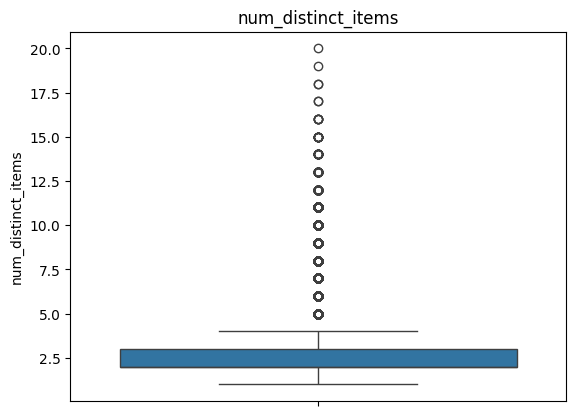

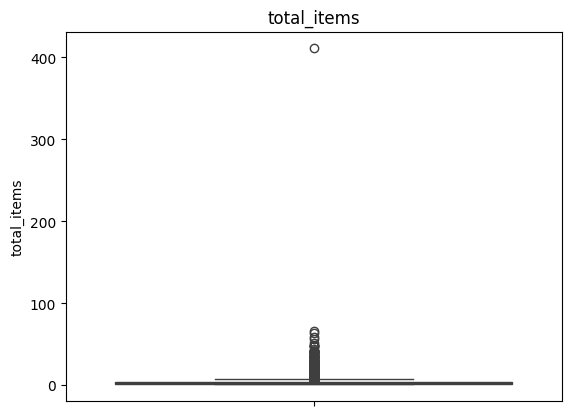

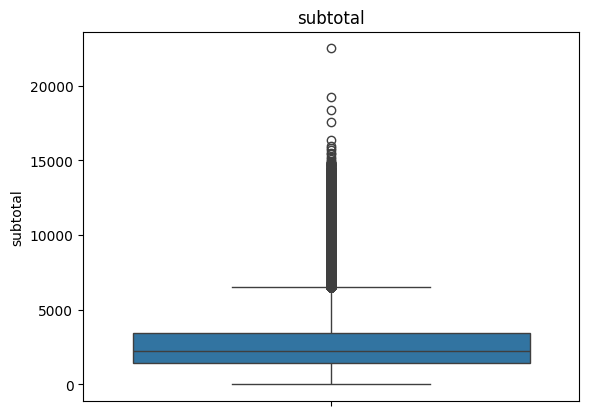

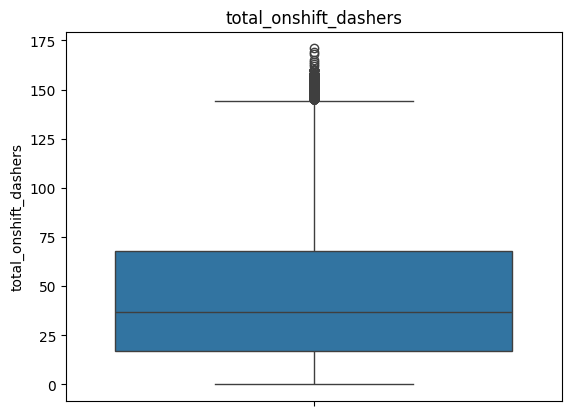

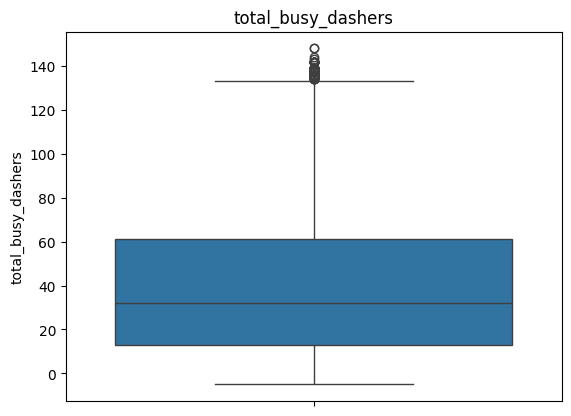

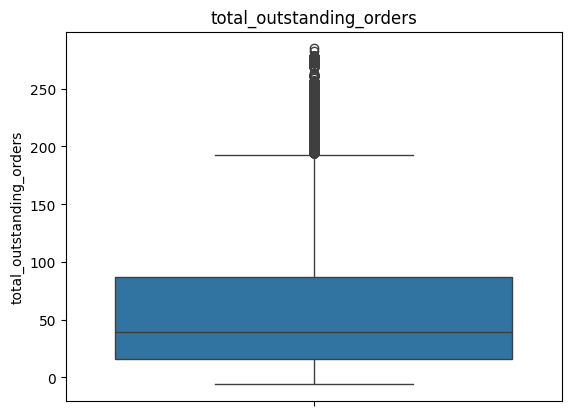

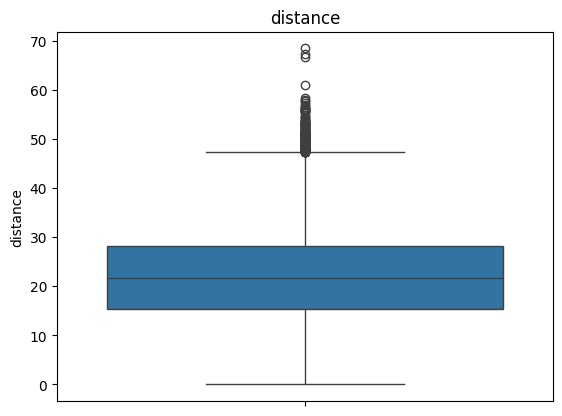

In [1031]:
# Handle outliers
base_vars = ['num_distinct_items', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

plot_outliers(df_dummies, base_vars)

## Handle outliers

In [1032]:
df_dummies = df_dummies[df_dummies['total_items'] < 200]

In [1033]:
df_dummies = df_dummies[df_dummies['subtotal'] <= 15000]

In [1034]:
df_dummies['distance'].describe()

count    136474.000000
mean         21.835635
std           8.766118
min           0.000000
25%          15.320000
50%          21.720000
75%          28.120000
max          68.440000
Name: distance, dtype: float64

In [1035]:
df_dummies = df_dummies[df_dummies['distance'] <= 70]

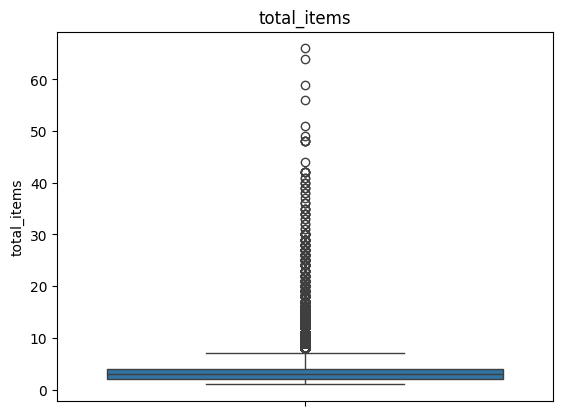

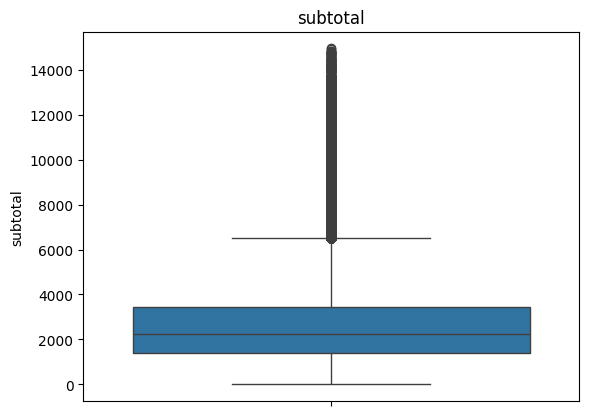

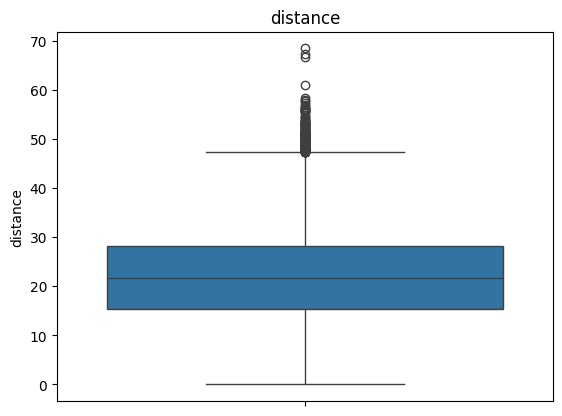

In [1036]:
plot_outliers(df_dummies, ['total_items', 'subtotal', 'distance'])

In [1037]:
df_dummies.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [1038]:
# Define target variable (y) and features (X)
X = df_dummies.drop('time_taken', axis=1)
y = df_dummies['time_taken']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [1039]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Creating a copy of the training and test datasets 
- one to be scaled 
- one keeping the original

In [1040]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled =  X_train, X_test, y_train, y_test

In [1041]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95531 entries, 149495 to 49756
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_items               95531 non-null  int64  
 1   subtotal                  95531 non-null  int64  
 2   num_distinct_items        95531 non-null  int64  
 3   total_onshift_dashers     95531 non-null  float64
 4   total_busy_dashers        95531 non-null  float64
 5   total_outstanding_orders  95531 non-null  float64
 6   distance                  95531 non-null  float64
 7   created_hour              95531 non-null  int32  
 8   created_day               95531 non-null  int32  
 9   store_cat_4               95531 non-null  int64  
 10  store_cat_6               95531 non-null  int64  
 11  store_cat_7               95531 non-null  int64  
 12  store_cat_10              95531 non-null  int64  
 13  store_cat_13              95531 non-null  int64  
 14  store_

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [1042]:
# Define numerical and categorical columns for easy EDA and data manipulation

In [1043]:
df.select_dtypes(include=['category']).columns.tolist()

['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

In [1044]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['total_items',
 'subtotal',
 'num_distinct_items',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'time_taken']

In [1045]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_vars = df.select_dtypes(include=['category']).columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [1046]:
def plot_numerical_data(df, cols):
    try:
        for i in cols:
            plt.figure(figsize=(10, 5))
            sns.histplot(df[i], kde=True)
            plt.title(i)
            plt.show()
    except Exception as e:
        print(f"Error plotting {i}: {e}")

def plot_categorical_data(df, cols):
    try:
        for i in cols:
            plt.figure(figsize=(10, 5))
            sns.countplot(x=df[i])
            plt.title(i)
            plt.xticks(rotation=90)
            plt.show()
    except Exception as e:
        print(f"Error plotting {i}: {e}")

def plot_relationship_with_time_taken(df, cols):
    try:
        for i in cols:
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=df[i], y=df['time_taken'])
            plt.title(f'{i} vs time_taken')
            plt.show()
    except Exception as e:
        print(f"Error plotting {i}: {e}")

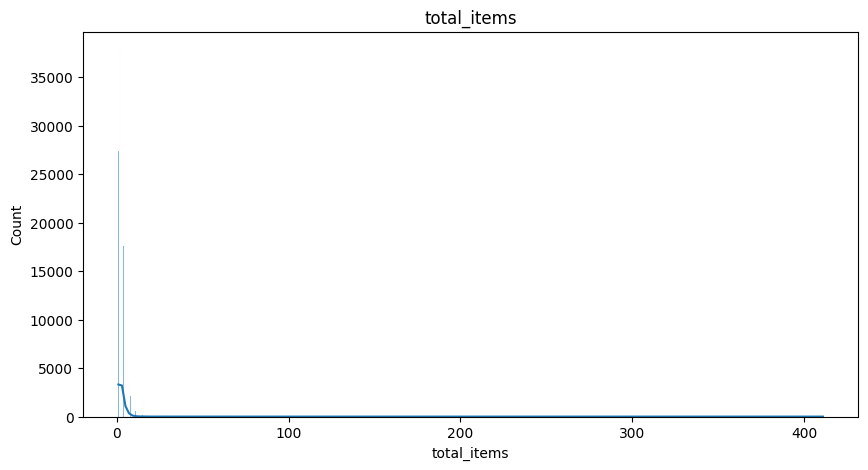

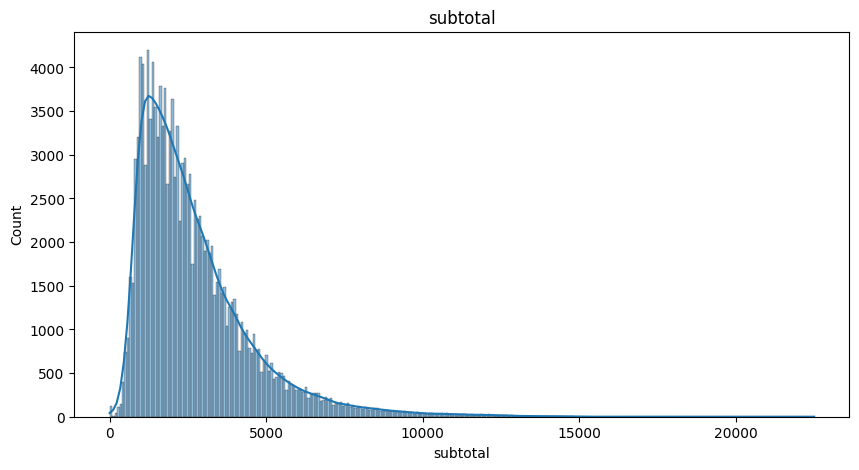

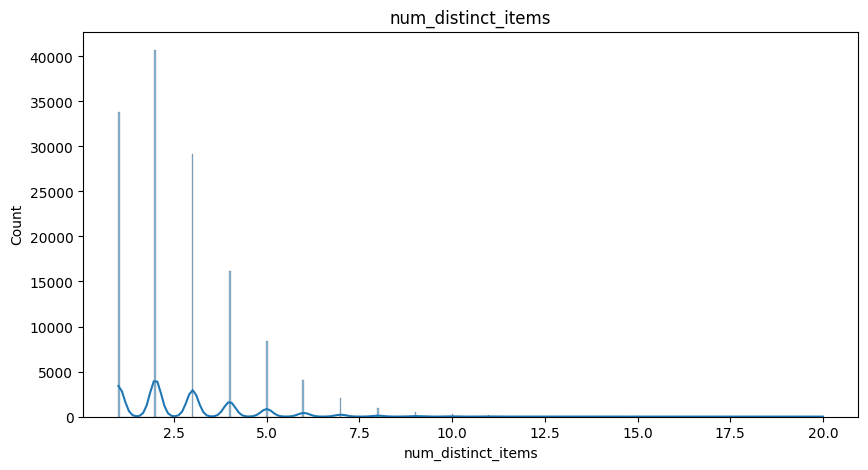

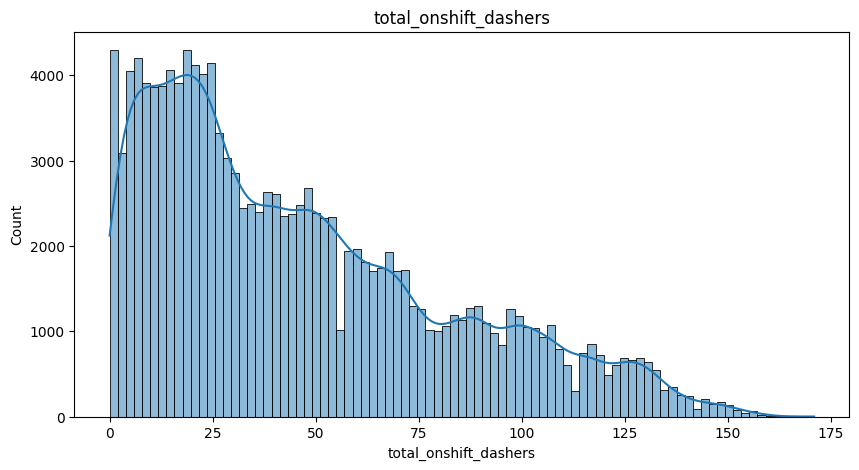

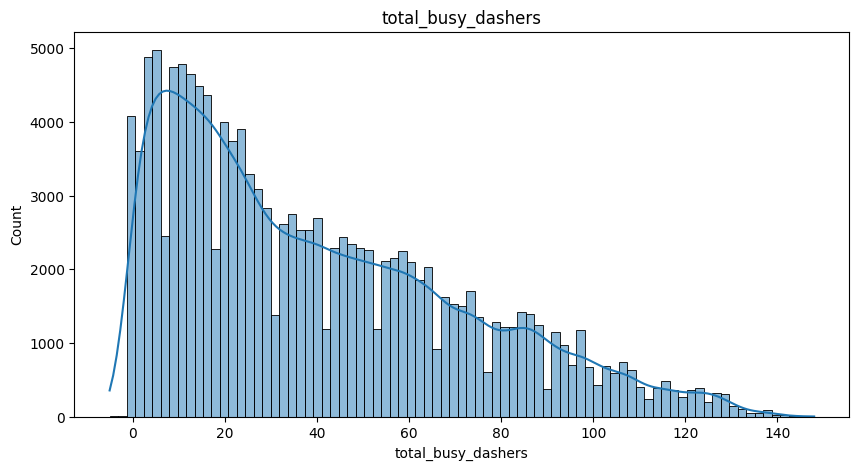

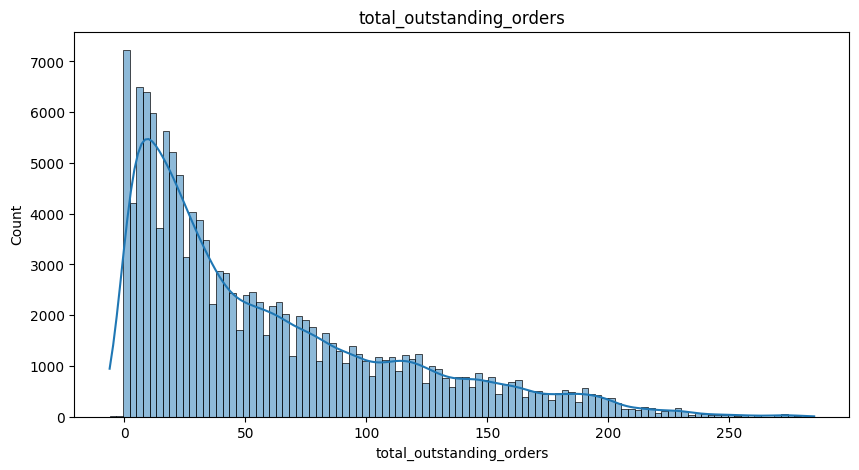

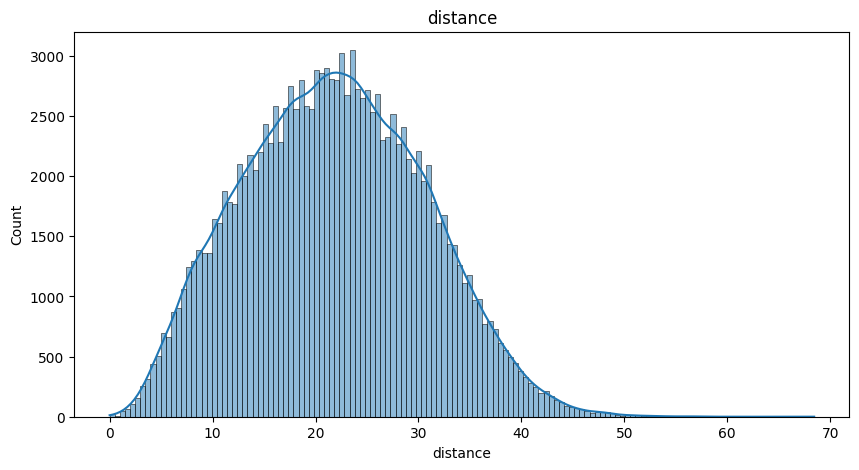

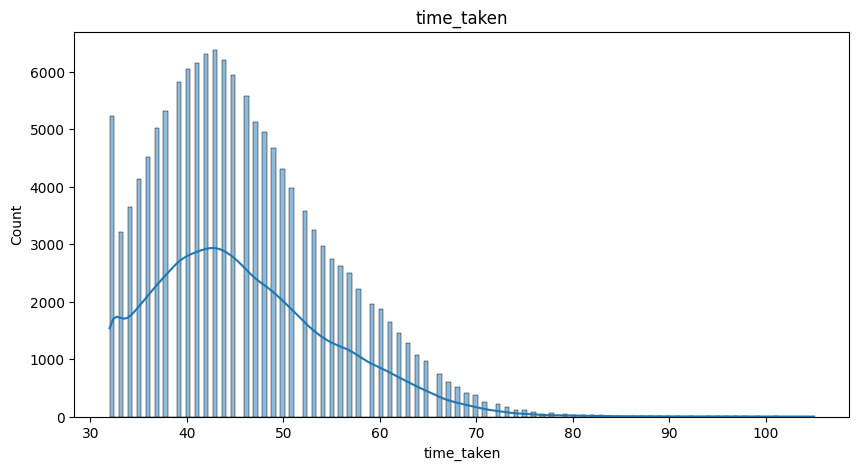

In [1047]:
# Plot distributions for all numerical columns
plot_numerical_data(df, num_vars)

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

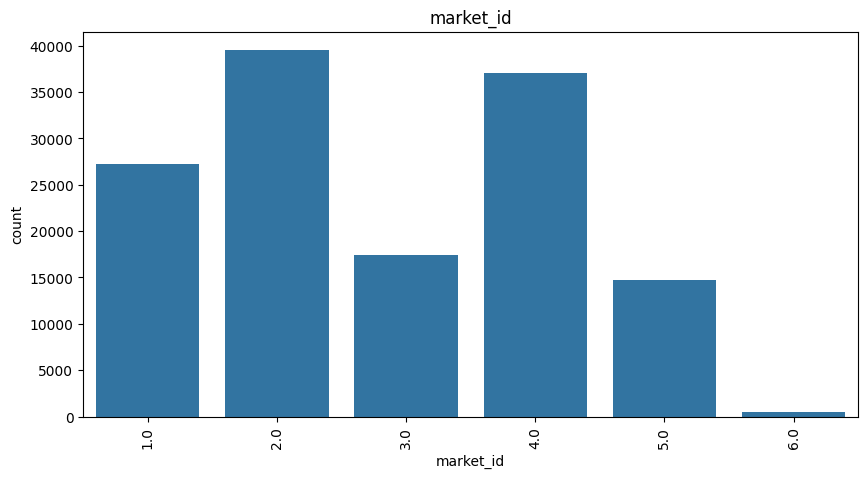

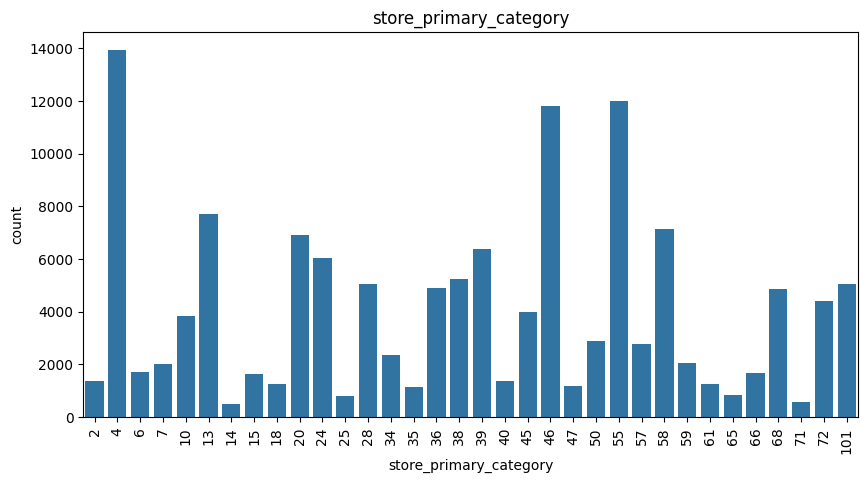

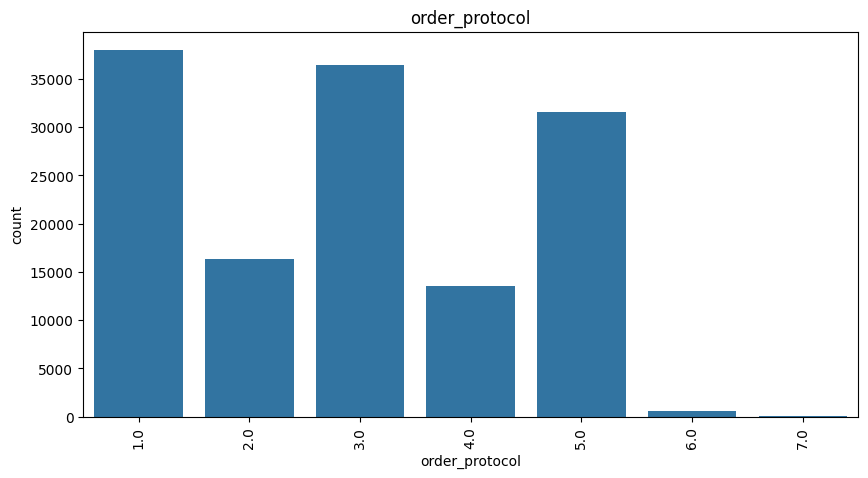

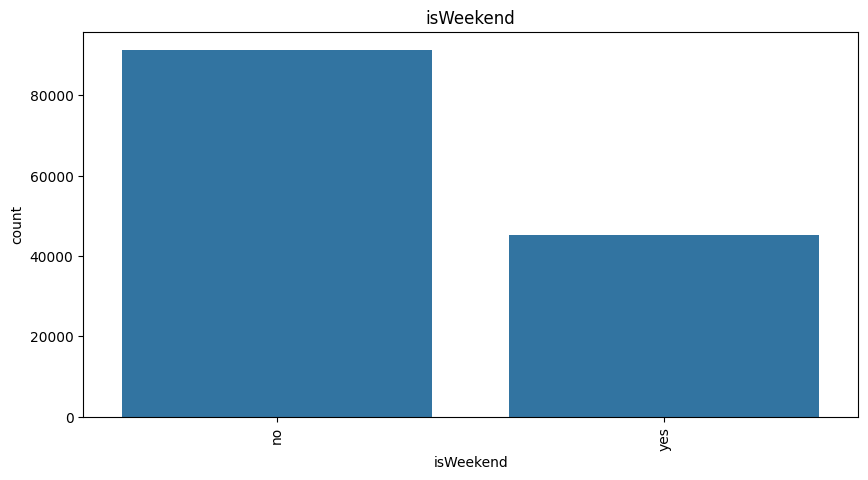

In [1048]:
# Distribution of categorical columns
plot_categorical_data(df, cat_vars)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [1049]:
# Distribution of time_taken
y_train

149495    44.0
146642    51.0
45677     61.0
82346     58.0
20305     46.0
          ... 
105892    65.0
84678     51.0
99960     53.0
72355     44.0
49756     54.0
Name: time_taken, Length: 95531, dtype: float64

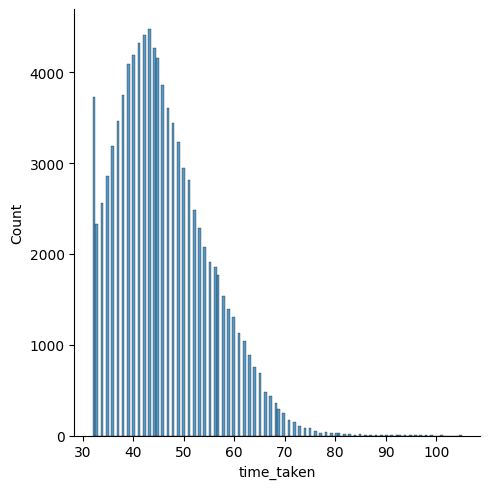

In [1050]:
sns.displot(y_train)

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

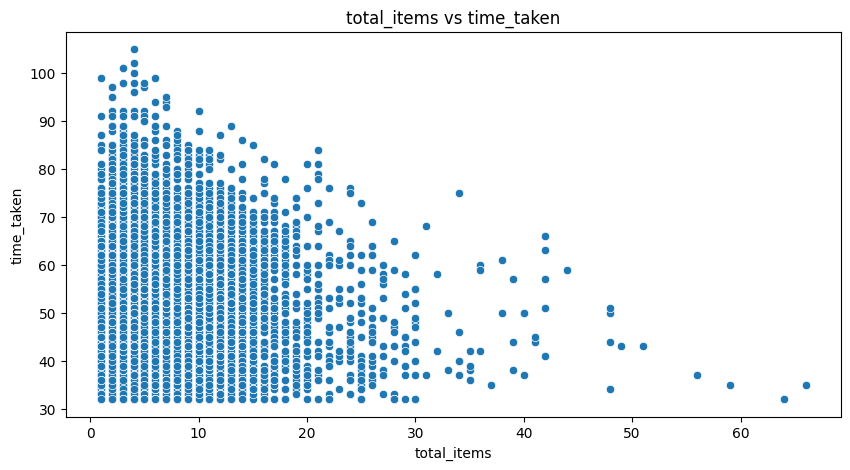

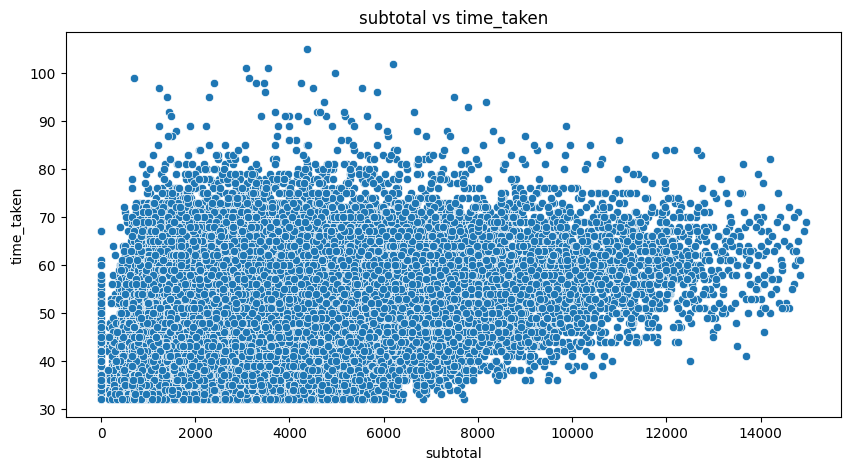

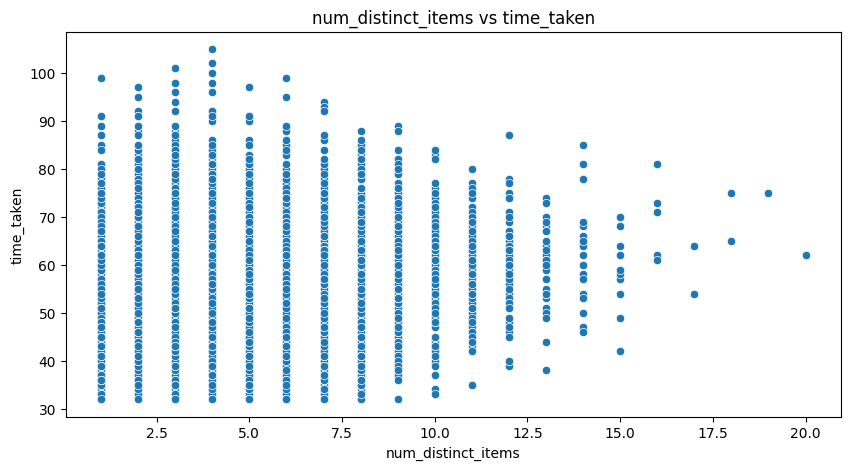

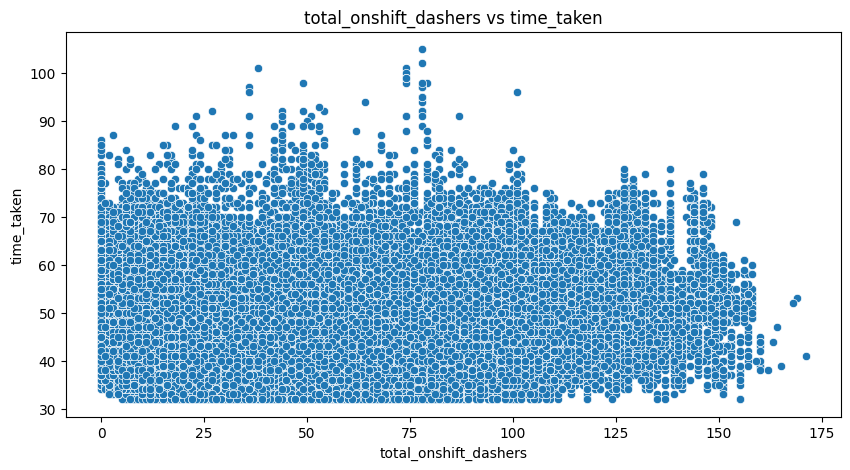

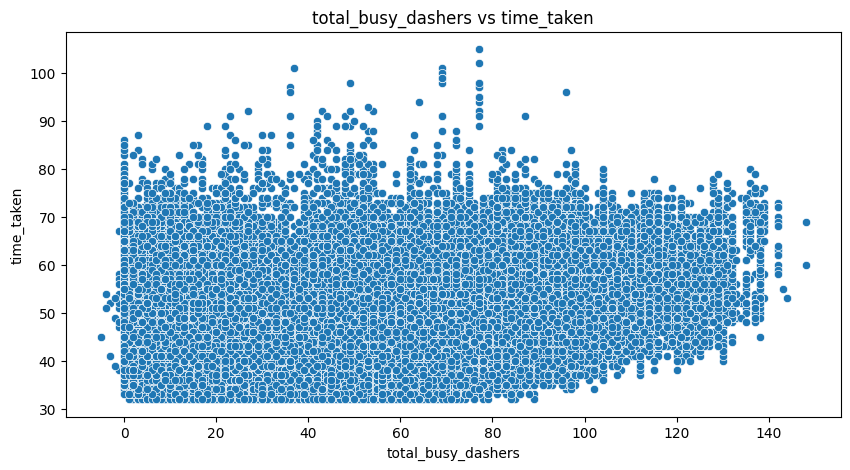

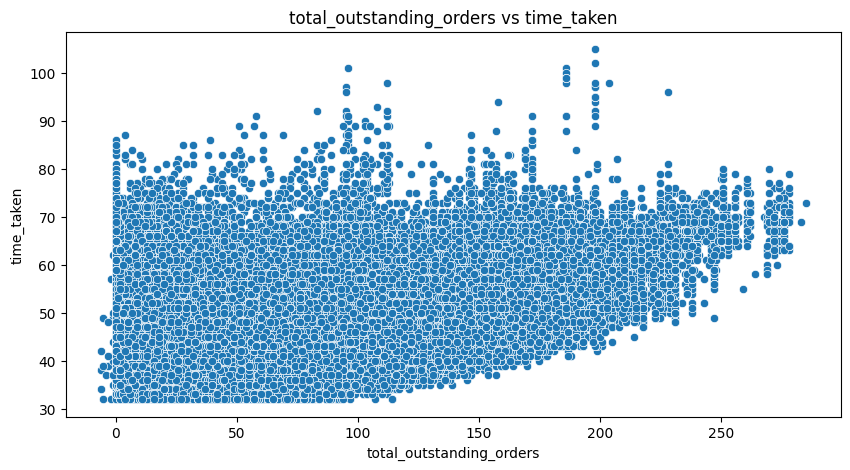

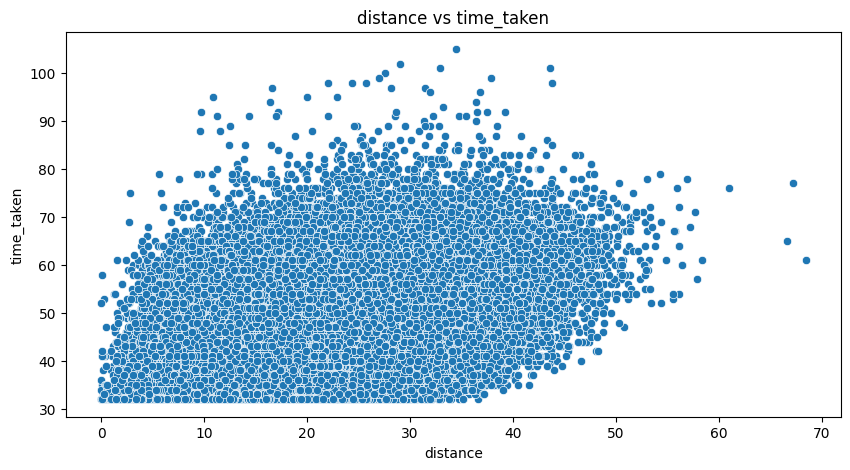

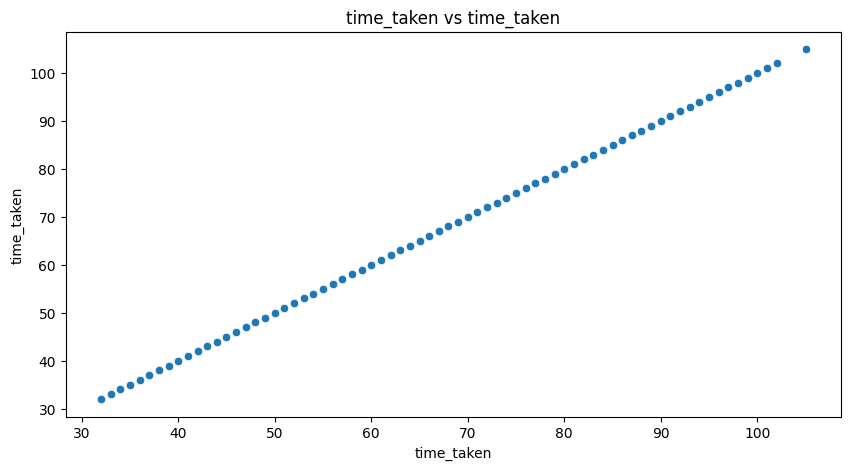

In [1051]:
# Scatter plot to visualise the relationship between time_taken and other features

plot_relationship_with_time_taken(df_dummies, num_vars)

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [1052]:
corr_vars = ['num_distinct_items', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken']

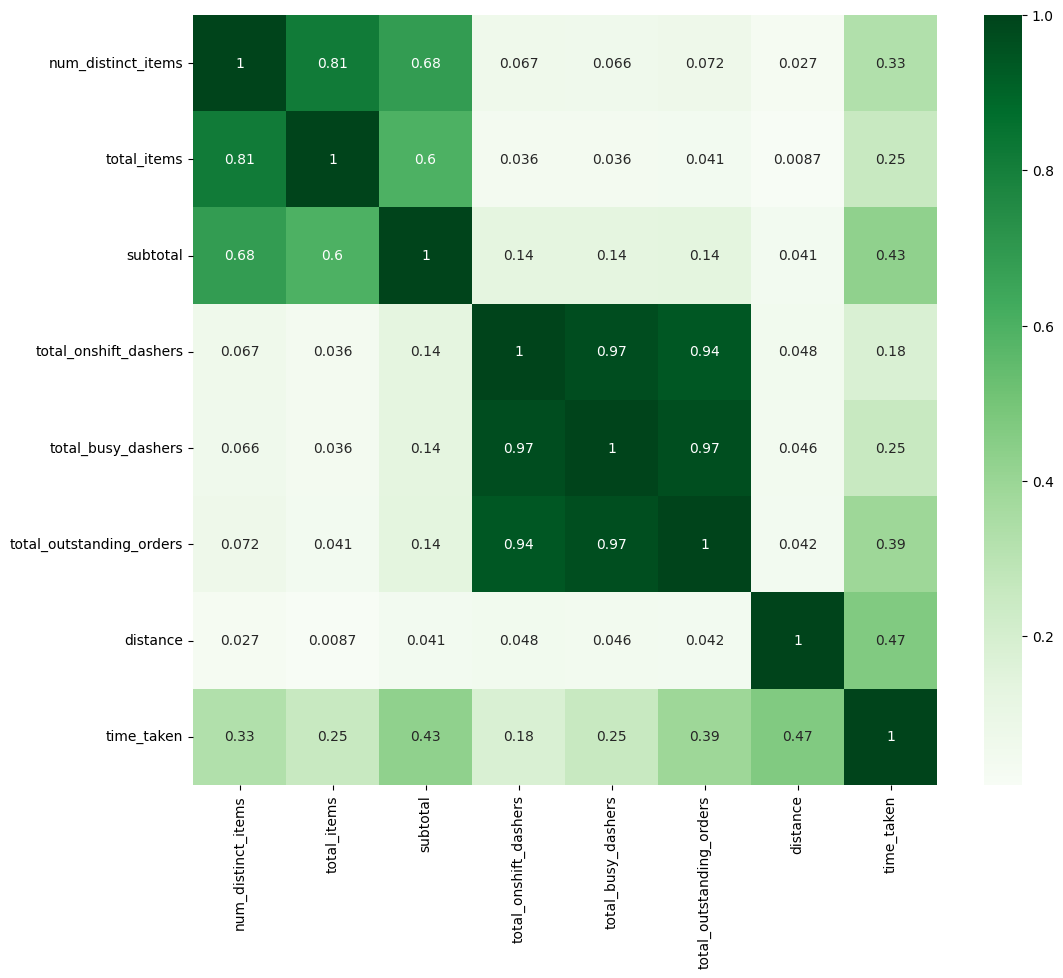

In [1053]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df_dummies[corr_vars].corr(), cmap='Greens', annot=True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [1054]:
# Drop 3-5 weakly correlated columns from training dataset
X_train.head(2)

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
149495            2      2539                   2                  118.0   
146642            6      4025                   5                   27.0   

        total_busy_dashers  total_outstanding_orders  distance  created_hour  \
149495               101.0                     145.0     16.40             2   
146642                21.0                      30.0     24.28             2   

        created_day  store_cat_4  ...  ord_pro_4.0  ord_pro_5.0  ord_pro_6.0  \
149495            3            0  ...            0            0            0   
146642            3            0  ...            0            0            0   

        ord_pro_7.0  mark_id_2.0  mark_id_3.0  mark_id_4.0  mark_id_5.0  \
149495            0            1            0            0            0   
146642            0            0            0            0            1   

        mark_id_6.0  is_weekend_yes  
149495            0               0  
146642            0               0  

[2 rows x 54 columns]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

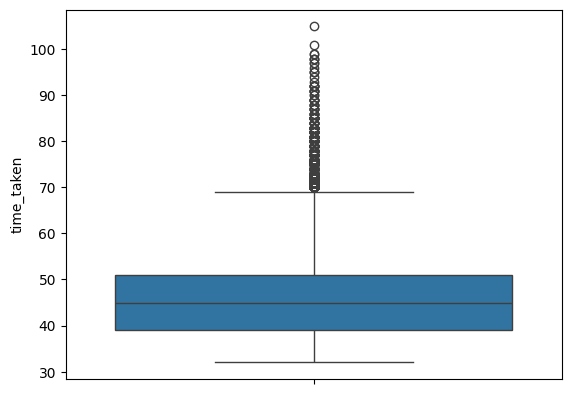

In [1055]:
# Boxplot for time_taken
sns.boxplot(y_train)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

This has been handled before spliting the data into training and test data

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [1056]:
# Define numerical and categorical columns for easy EDA and data manipulation

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

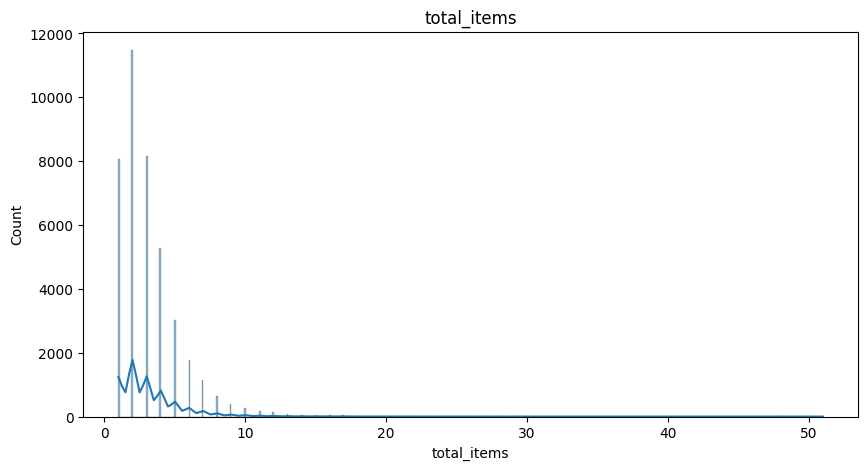

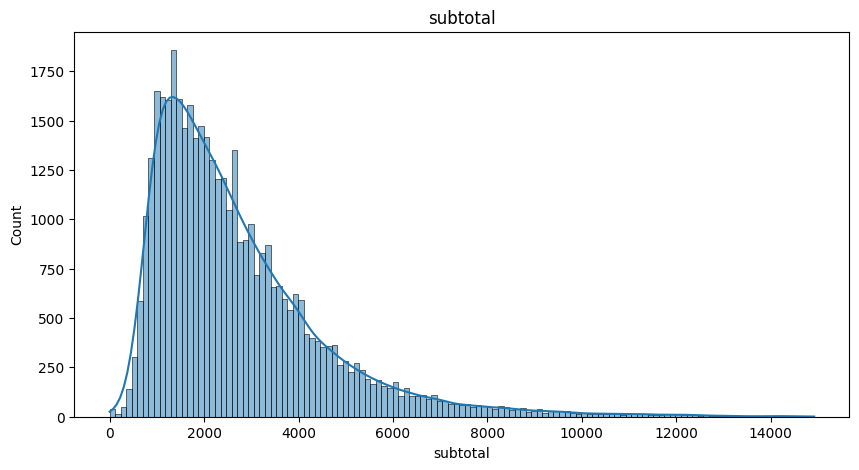

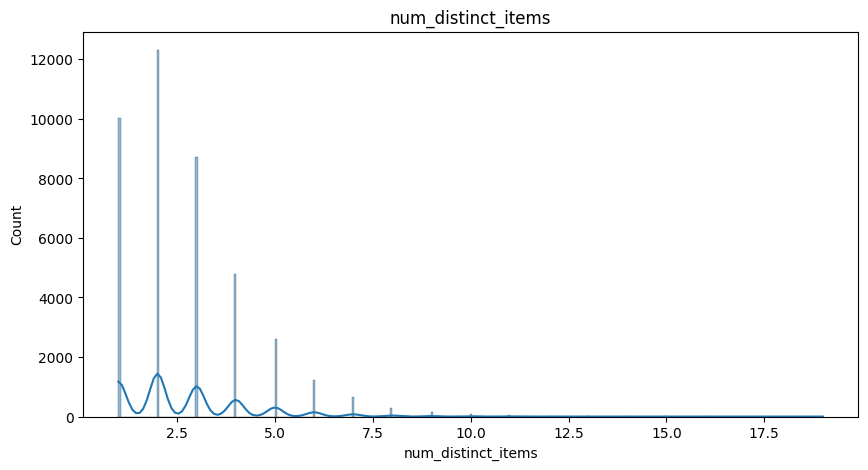

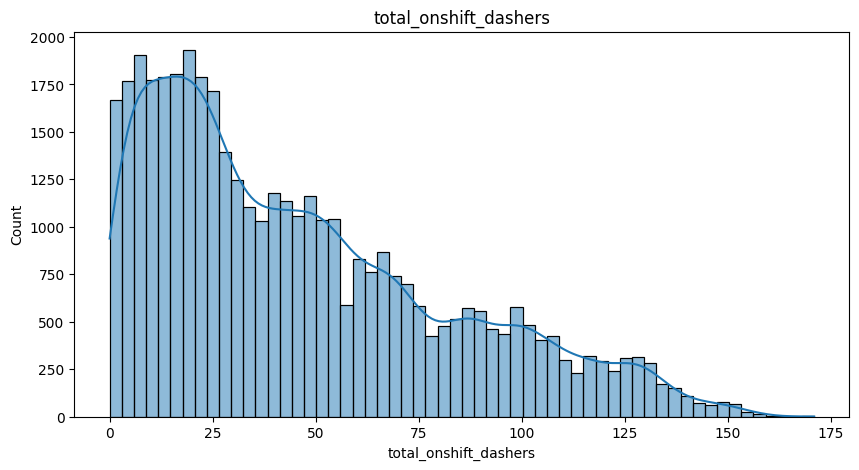

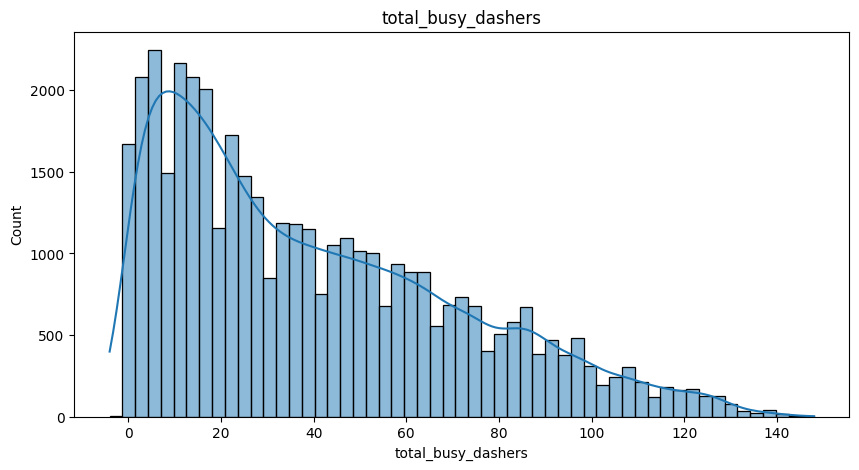

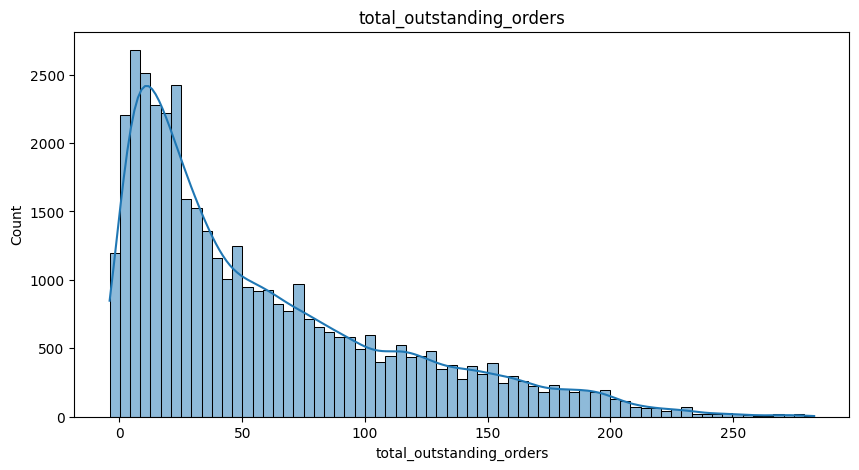

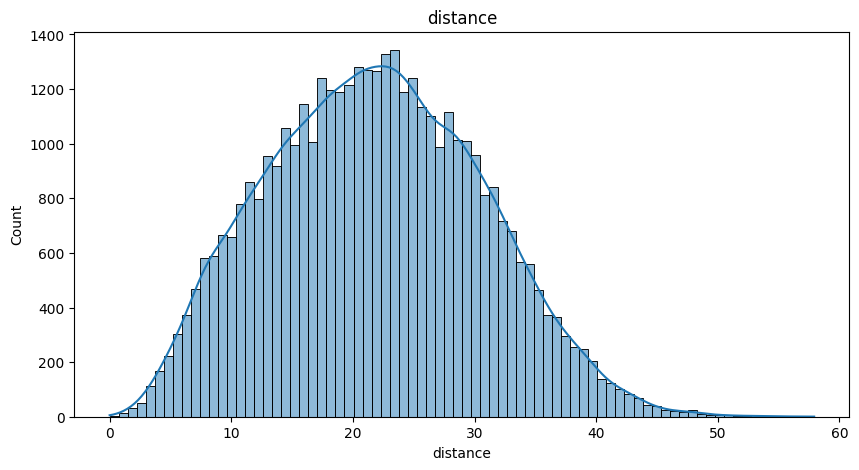

Error plotting time_taken: 'time_taken'


<Figure size 1000x500 with 0 Axes>

In [1057]:
# Plot distributions for all numerical columns

plot_numerical_data(X_test, num_vars)

##### **4.1.2**
Check the distribution of categorical features

In [1058]:
# Distribution of categorical columns
# test data has no categorical columns, they have been converted to dummies
# Plot distributions for all categorical columns

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

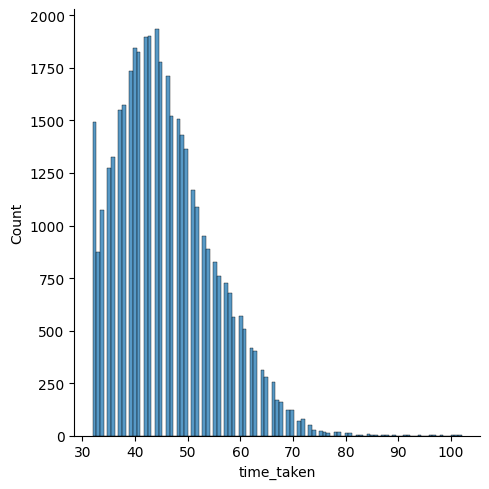

In [1059]:
# Distribution of time_taken

sns.displot(y_test)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [1060]:
# Scatter plot to visualise the relationship between time_taken and other features


#### **4.3** Drop the columns with weak correlations with the target variable

In [1061]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [1062]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [1063]:
X_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'created_day',
       'store_cat_4', 'store_cat_6', 'store_cat_7', 'store_cat_10',
       'store_cat_13', 'store_cat_14', 'store_cat_15', 'store_cat_18',
       'store_cat_20', 'store_cat_24', 'store_cat_25', 'store_cat_28',
       'store_cat_34', 'store_cat_35', 'store_cat_36', 'store_cat_38',
       'store_cat_39', 'store_cat_40', 'store_cat_45', 'store_cat_46',
       'store_cat_47', 'store_cat_50', 'store_cat_55', 'store_cat_57',
       'store_cat_58', 'store_cat_59', 'store_cat_61', 'store_cat_65',
       'store_cat_66', 'store_cat_68', 'store_cat_71', 'store_cat_72',
       'store_cat_101', 'ord_pro_2.0', 'ord_pro_3.0', 'ord_pro_4.0',
       'ord_pro_5.0', 'ord_pro_6.0', 'ord_pro_7.0', 'mark_id_2.0',
       'mark_id_3.0', 'mark_id_4.0', 'mark_id_5.0', 'mark_id_6.0',
       'is_weekend_yes'],
      dtype='objec

In [1064]:
num_vars

['total_items',
 'subtotal',
 'num_distinct_items',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'time_taken']

In [1065]:
num_data_vars = [
    'total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers',   'total_busy_dashers', 'total_outstanding_orders', 'distance'
]

In [1066]:
scaler = StandardScaler()

# Apply scaling to the numerical columns
X_train_scaled[num_data_vars] = scaler.fit_transform(X_train_scaled[num_data_vars])
X_test_scaled[num_data_vars] = scaler.transform(X_test_scaled[num_data_vars])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head(2)

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
149495    -0.486473 -0.091459           -0.420268               1.994207   
146642     1.117199  0.717416            1.421104              -0.530799   

        total_busy_dashers  total_outstanding_orders  distance  created_hour  \
149495            1.928966                  1.597542 -0.618989             2   
146642           -0.595955                 -0.518807  0.279467             2   

        created_day  store_cat_4  ...  ord_pro_4.0  ord_pro_5.0  ord_pro_6.0  \
149495            3            0  ...            0            0            0   
146642            3            0  ...            0            0            0   

        ord_pro_7.0  mark_id_2.0  mark_id_3.0  mark_id_4.0  mark_id_5.0  \
149495            0            1            0            0            0   
146642            0            0            0            0            1   

        mark_id_6.0  is_weekend_yes  
149495            0               0  
146642            0               0  

[2 rows x 54 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [1067]:
# Create/Initialise the model
estimator = LinearRegression()

# Train the model using the training data
lr_model_scaled = estimator.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = lr_model_scaled.predict(X_test_scaled)

# Find results for evaluation metrics
y_pred_scaled

array([61.08990846, 41.58993311, 38.6240903 , ..., 46.08193168,
       43.1316108 , 40.80089282])

In [1068]:
# Train the model using the training data
lr_model = estimator.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Find results for evaluation metrics
y_pred

array([61.08990846, 41.58993311, 38.6240903 , ..., 46.08193168,
       43.1316108 , 40.80089282])

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [1069]:
len(X_train_scaled.columns.tolist())

54

In [1070]:
X_train_scaled.columns

Index(['total_items', 'subtotal', 'num_distinct_items',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'created_day',
       'store_cat_4', 'store_cat_6', 'store_cat_7', 'store_cat_10',
       'store_cat_13', 'store_cat_14', 'store_cat_15', 'store_cat_18',
       'store_cat_20', 'store_cat_24', 'store_cat_25', 'store_cat_28',
       'store_cat_34', 'store_cat_35', 'store_cat_36', 'store_cat_38',
       'store_cat_39', 'store_cat_40', 'store_cat_45', 'store_cat_46',
       'store_cat_47', 'store_cat_50', 'store_cat_55', 'store_cat_57',
       'store_cat_58', 'store_cat_59', 'store_cat_61', 'store_cat_65',
       'store_cat_66', 'store_cat_68', 'store_cat_71', 'store_cat_72',
       'store_cat_101', 'ord_pro_2.0', 'ord_pro_3.0', 'ord_pro_4.0',
       'ord_pro_5.0', 'ord_pro_6.0', 'ord_pro_7.0', 'mark_id_2.0',
       'mark_id_3.0', 'mark_id_4.0', 'mark_id_5.0', 'mark_id_6.0',
       'is_weekend_yes'],
      dtype='objec

In [1071]:
# Loop through the number of features and test the model

selector = RFE(estimator, n_features_to_select=13)

selector = selector.fit(X_train_scaled, y_train)
selected_features=X_train_scaled.columns[selector.support_]

X_train_scaled_selected=X_train_scaled[selected_features]
X_test_scaled_selected=X_test_scaled[selected_features]

print("X_train_scaled_selected shape", X_train_scaled_selected.shape)
print("X_test_scaled_selected shape", X_test_scaled_selected.shape)

X_train_scaled_selected shape (95531, 13)
X_test_scaled_selected shape (40943, 13)


In [1072]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def train_model(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(np.array(y_train), X_train_sm)
    res = model.fit()
    return model, res

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature']=X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data.sort_values(by='VIF', ascending=False)


In [1073]:
model1, res1 = train_model(X_train_scaled_selected, y_train)
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 4.755e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:11:29   Log-Likelihood:            -2.5080e+05
No. Observations:               95531   AIC:                         5.016e+05
Df Residuals:                   95517   BIC:                         5.018e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       50.3819      0.027   1863.038      0.000      50.329      50.435
subtotal                     3.2471      0.011    292.511      0.000       3.225       3.269
total_onshift_dashers       -9.5647      0.045   -212.658      0.000      -9.653      -9.477
total_busy_dashers          -7.2728      0.059   -123.105      0.000      -7.389      -7.157
total_outstanding_orders    19.9058      0.042    470.631      0.000      19.823      19.989
distance                     4.2253      0.011    389.068      0.000       4.204       4.247
ord_pro_4.0                 -1.1578      0.038    -30.750      0.000      -1.232      -1.084
ord_pro_5.0                 -2.1337      0.026    -80.835      0.000      -2.185      -2.082
ord_pro_7.0                 -1.9636      1.008     -1.948      0.051      -3.939       0.012
mark_id_2.0                 -5.7397      0.036   -161.136      0.000      -5.810      -5.670
mark_id_3.0                 -3.8833      0.039    -99.847      0.000      -3.960      -3.807
mark_id_4.0                 -5.0391      0.035   -143.408      0.000      -5.108      -4.970
mark_id_5.0                 -3.3470      0.041    -80.793      0.000      -3.428      -3.266
mark_id_6.0                 -3.1908      0.178    -17.975      0.000      -3.539      -2.843
==============================================================================
Omnibus:                    14294.369   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34853.353
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       5.414   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1074]:
vif_data_1 = calculate_vif(X_train_scaled_selected)
vif_data_1

Feature        VIF
2         total_busy_dashers  29.840145
1      total_onshift_dashers  16.966780
3   total_outstanding_orders  15.305383
8                mark_id_2.0   1.311070
6                ord_pro_5.0   1.282821
10               mark_id_4.0   1.223982
5                ord_pro_4.0   1.151011
9                mark_id_3.0   1.142450
11               mark_id_5.0   1.116462
0                   subtotal   1.048283
4                   distance   1.008037
12               mark_id_6.0   1.001812
7                ord_pro_7.0   1.001106

## We will drop 'total_busy_dashers' as it has the highest VIF and rebuild the model

In [1075]:
X_train_scaled_selected=X_train_scaled_selected.drop('total_busy_dashers', axis=1)
X_test_scaled_selected=X_test_scaled_selected.drop('total_busy_dashers', axis=1)

In [1076]:
model2, res2 = train_model(X_train_scaled_selected, y_train)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 4.337e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:11:34   Log-Likelihood:            -2.5783e+05
No. Observations:               95531   AIC:                         5.157e+05
Df Residuals:                   95518   BIC:                         5.158e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       50.2916      0.029   1728.328      0.000      50.235      50.349
subtotal                     3.2540      0.012    272.336      0.000       3.231       3.277
total_onshift_dashers      -13.3451      0.035   -377.275      0.000     -13.414     -13.276
total_outstanding_orders    16.4808      0.034    480.611      0.000      16.414      16.548
distance                     4.2162      0.012    360.681      0.000       4.193       4.239
ord_pro_4.0                 -1.1206      0.041    -27.651      0.000      -1.200      -1.041
ord_pro_5.0                 -2.2270      0.028    -78.413      0.000      -2.283      -2.171
ord_pro_7.0                 -1.6353      1.085     -1.507      0.132      -3.762       0.491
mark_id_2.0                 -5.7620      0.038   -150.280      0.000      -5.837      -5.687
mark_id_3.0                 -3.7339      0.042    -89.234      0.000      -3.816      -3.652
mark_id_4.0                 -4.9368      0.038   -130.560      0.000      -5.011      -4.863
mark_id_5.0                 -2.7248      0.044    -61.564      0.000      -2.812      -2.638
mark_id_6.0                 -3.0932      0.191    -16.189      0.000      -3.468      -2.719
==============================================================================
Omnibus:                    18606.621   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51955.074
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                       5.954   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1077]:
vif_data_3 = calculate_vif(X_train_scaled_selected)
vif_data_3

Feature       VIF
1      total_onshift_dashers  8.982080
2   total_outstanding_orders  8.673632
7                mark_id_2.0  1.308988
5                ord_pro_5.0  1.281055
9                mark_id_4.0  1.223954
4                ord_pro_4.0  1.151002
8                mark_id_3.0  1.142020
10               mark_id_5.0  1.098212
0                   subtotal  1.048274
3                   distance  1.008002
11               mark_id_6.0  1.001812
6                ord_pro_7.0  1.001099

## We will drop 'total_onshift_dashers' as it has the highest VIF and rebuild the model

In [1078]:
X_train_scaled_selected = X_train_scaled_selected.drop(['total_onshift_dashers'], axis=1)
X_test_scaled_selected = X_test_scaled_selected.drop(['total_onshift_dashers'], axis=1)

In [1079]:
model3, res3 = train_model(X_train_scaled_selected, y_train)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.380e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:15:28   Log-Likelihood:            -3.0141e+05
No. Observations:               95531   AIC:                         6.028e+05
Df Residuals:                   95519   BIC:                         6.030e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       52.1238      0.045   1151.307      0.000      52.035      52.213
subtotal                     3.1246      0.019    165.783      0.000       3.088       3.161
total_outstanding_orders     4.6874      0.022    210.701      0.000       4.644       4.731
distance                     4.1574      0.018    225.397      0.000       4.121       4.194
ord_pro_4.0                 -1.0849      0.064    -16.964      0.000      -1.210      -0.960
ord_pro_5.0                 -2.6670      0.045    -59.559      0.000      -2.755      -2.579
ord_pro_7.0                 -0.0700      1.712     -0.041      0.967      -3.426       3.286
mark_id_2.0                 -9.3796      0.059   -160.114      0.000      -9.494      -9.265
mark_id_3.0                 -4.0550      0.066    -61.424      0.000      -4.184      -3.926
mark_id_4.0                 -7.0061      0.059   -118.671      0.000      -7.122      -6.890
mark_id_5.0                 -3.4431      0.070    -49.345      0.000      -3.580      -3.306
mark_id_6.0                 -4.7237      0.301    -15.671      0.000      -5.314      -4.133
==============================================================================
Omnibus:                     6413.820   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11824.305
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                       4.411   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1080]:
vif_data_2 = calculate_vif(X_train_scaled_selected)
vif_data_2

Feature       VIF
1   total_outstanding_orders  1.341605
4                ord_pro_5.0  1.281045
6                mark_id_2.0  1.260429
8                mark_id_4.0  1.222945
3                ord_pro_4.0  1.149551
7                mark_id_3.0  1.133087
9                mark_id_5.0  1.094525
0                   subtotal  1.047991
2                   distance  1.007636
10               mark_id_6.0  1.001811
5                ord_pro_7.0  1.001084

## We will drop 'ord_pro_7.0' as it has the highest p value and rebuild the model

In [1081]:
X_train_scaled_selected=X_train_scaled_selected.drop('ord_pro_7.0', axis=1)
X_test_scaled_selected=X_test_scaled_selected.drop('ord_pro_7.0', axis=1)

In [1082]:
model4, res4 = train_model(X_train_scaled_selected, y_train)
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.518e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:15:55   Log-Likelihood:            -3.0141e+05
No. Observations:               95531   AIC:                         6.028e+05
Df Residuals:                   95520   BIC:                         6.029e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       52.1238      0.045   1151.313      0.000      52.035      52.213
subtotal                     3.1246      0.019    165.784      0.000       3.088       3.161
total_outstanding_orders     4.6874      0.022    210.704      0.000       4.644       4.731
distance                     4.1574      0.018    225.413      0.000       4.121       4.194
ord_pro_4.0                 -1.0849      0.064    -16.964      0.000      -1.210      -0.960
ord_pro_5.0                 -2.6670      0.045    -59.560      0.000      -2.755      -2.579
mark_id_2.0                 -9.3796      0.059   -160.115      0.000      -9.494      -9.265
mark_id_3.0                 -4.0550      0.066    -61.424      0.000      -4.184      -3.926
mark_id_4.0                 -7.0061      0.059   -118.672      0.000      -7.122      -6.890
mark_id_5.0                 -3.4432      0.070    -49.361      0.000      -3.580      -3.306
mark_id_6.0                 -4.7237      0.301    -15.671      0.000      -5.314      -4.133
==============================================================================
Omnibus:                     6413.811   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11824.281
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                       4.411   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1083]:
vif_data_4 = calculate_vif(X_train_scaled_selected)
vif_data_4

Feature       VIF
1  total_outstanding_orders  1.341590
4               ord_pro_5.0  1.281020
5               mark_id_2.0  1.260395
7               mark_id_4.0  1.222936
3               ord_pro_4.0  1.149496
6               mark_id_3.0  1.133086
8               mark_id_5.0  1.093567
0                  subtotal  1.047985
2                  distance  1.007506
9               mark_id_6.0  1.001811

In [1084]:
X_train_sm = sm.add_constant(X_train_scaled_selected)
X_test_sm = sm.add_constant(X_test_scaled_selected)

y_train_pred=res4.predict(X_train_sm)
y_test_pred=res4.predict(X_test_sm)

## We will build a model with unscaled data for comparision based on the final selected features

In [1085]:
X_train_unscaled_selected=X_train[selected_features]
X_test_unscaled_selected=X_test[selected_features]

In [1086]:
vars = [
    'total_onshift_dashers', 'total_busy_dashers', 'ord_pro_7.0'
]

X_train_unscaled_selected.drop(vars, axis=1, inplace=True)
X_test_unscaled_selected.drop(vars, axis=1, inplace=True)

print(X_train_unscaled_selected.shape)
print(X_test_unscaled_selected.shape)

(95531, 10)
(40943, 10)


In [1087]:
# Build the unscaled model with selected number of features
model_unscaled, res_unscaled = train_model(X_test_unscaled_selected, y_test)
res_unscaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     6418.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:17:39   Log-Likelihood:            -1.2905e+05
No. Observations:               40943   AIC:                         2.581e+05
Df Residuals:                   40932   BIC:                         2.582e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       52.1261      0.069    759.225      0.000      51.991      52.261
subtotal                     3.0763      0.029    107.793      0.000       3.020       3.132
total_outstanding_orders     4.6896      0.034    138.957      0.000       4.623       4.756
distance                     4.1921      0.028    148.977      0.000       4.137       4.247
ord_pro_4.0                 -1.0364      0.096    -10.762      0.000      -1.225      -0.848
ord_pro_5.0                 -2.5744      0.068    -37.789      0.000      -2.708      -2.441
mark_id_2.0                 -9.3847      0.089   -105.583      0.000      -9.559      -9.210
mark_id_3.0                 -3.8883      0.100    -38.751      0.000      -4.085      -3.692
mark_id_4.0                 -6.9619      0.090    -77.406      0.000      -7.138      -6.786
mark_id_5.0                 -3.5957      0.106    -33.937      0.000      -3.803      -3.388
mark_id_6.0                 -4.6596      0.486     -9.583      0.000      -5.613      -3.707
==============================================================================
Omnibus:                     2573.916   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4633.074
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       4.346   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [1088]:
residue_train = y_train - y_train_pred

Text(0.5, 0, 'Errors')

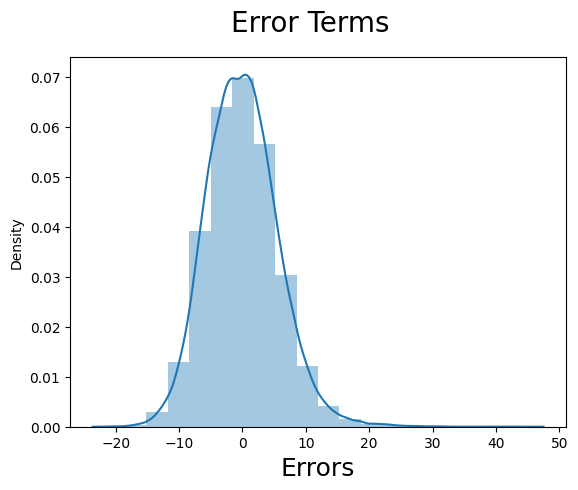

In [1089]:
fig = plt.figure()
sns.distplot(residue_train, bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

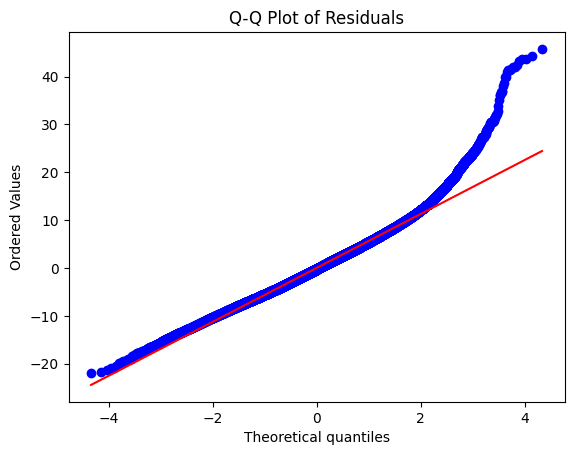

In [1090]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

stats.probplot(residue_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

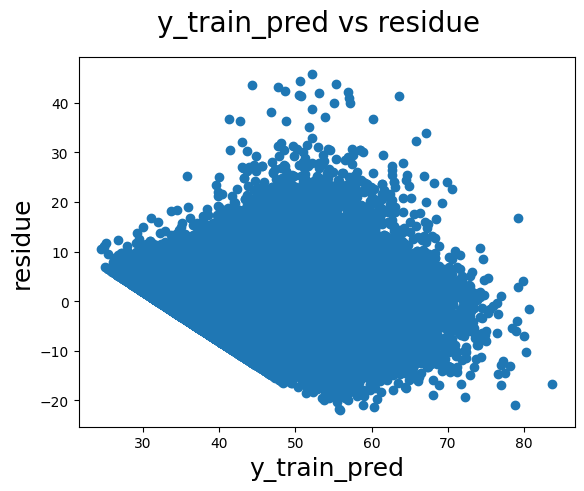

In [1094]:
fig = plt.figure()
plt.scatter(x=y_train_pred, y=residue_train)
fig.suptitle('y_train_pred vs residue', fontsize=20)
plt.xlabel('y_train_pred', fontsize=18)
plt.ylabel('residue', fontsize=18)
plt.show()

In [1092]:
residue_test = y_test - y_test_pred

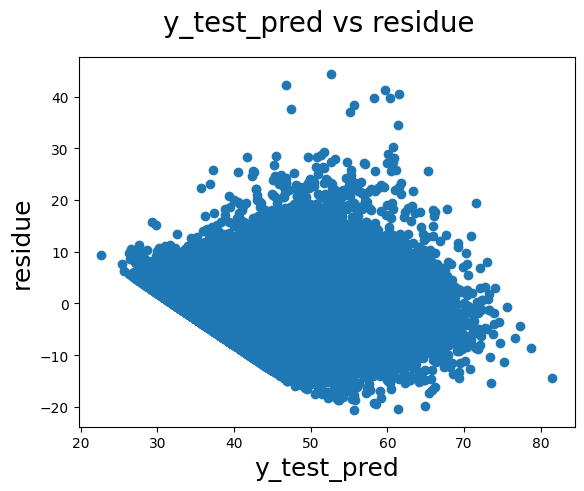

In [1095]:
fig = plt.figure()
plt.scatter(x=y_test_pred, y=residue_test)
fig.suptitle('y_test_pred vs residue', fontsize=20)
plt.xlabel('y_test_pred', fontsize=18)
plt.ylabel('residue', fontsize=18)
plt.show()

In [1096]:
round(res4.params, 2)

const                       52.12
subtotal                     3.12
total_outstanding_orders     4.69
distance                     4.16
ord_pro_4.0                 -1.08
ord_pro_5.0                 -2.67
mark_id_2.0                 -9.38
mark_id_3.0                 -4.05
mark_id_4.0                 -7.01
mark_id_5.0                 -3.44
mark_id_6.0                 -4.72
dtype: float64

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [1097]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.518e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:32:52   Log-Likelihood:            -3.0141e+05
No. Observations:               95531   AIC:                         6.028e+05
Df Residuals:                   95520   BIC:                         6.029e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       52.1238      0.045   1151.313      0.000      52.035      52.213
subtotal                     3.1246      0.019    165.784      0.000       3.088       3.161
total_outstanding_orders     4.6874      0.022    210.704      0.000       4.644       4.731
distance                     4.1574      0.018    225.413      0.000       4.121       4.194
ord_pro_4.0                 -1.0849      0.064    -16.964      0.000      -1.210      -0.960
ord_pro_5.0                 -2.6670      0.045    -59.560      0.000      -2.755      -2.579
mark_id_2.0                 -9.3796      0.059   -160.115      0.000      -9.494      -9.265
mark_id_3.0                 -4.0550      0.066    -61.424      0.000      -4.184      -3.926
mark_id_4.0                 -7.0061      0.059   -118.672      0.000      -7.122      -6.890
mark_id_5.0                 -3.4432      0.070    -49.361      0.000      -3.580      -3.306
mark_id_6.0                 -4.7237      0.301    -15.671      0.000      -5.314      -4.133
==============================================================================
Omnibus:                     6413.811   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11824.281
Skew:                           0.495   Prob(JB):                         0.00
Kurtosis:                       4.411   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1098]:
res_unscaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     6418.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:32:56   Log-Likelihood:            -1.2905e+05
No. Observations:               40943   AIC:                         2.581e+05
Df Residuals:                   40932   BIC:                         2.582e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       52.1261      0.069    759.225      0.000      51.991      52.261
subtotal                     3.0763      0.029    107.793      0.000       3.020       3.132
total_outstanding_orders     4.6896      0.034    138.957      0.000       4.623       4.756
distance                     4.1921      0.028    148.977      0.000       4.137       4.247
ord_pro_4.0                 -1.0364      0.096    -10.762      0.000      -1.225      -0.848
ord_pro_5.0                 -2.5744      0.068    -37.789      0.000      -2.708      -2.441
mark_id_2.0                 -9.3847      0.089   -105.583      0.000      -9.559      -9.210
mark_id_3.0                 -3.8883      0.100    -38.751      0.000      -4.085      -3.692
mark_id_4.0                 -6.9619      0.090    -77.406      0.000      -7.138      -6.786
mark_id_5.0                 -3.5957      0.106    -33.937      0.000      -3.803      -3.388
mark_id_6.0                 -4.6596      0.486     -9.583      0.000      -5.613      -3.707
==============================================================================
Omnibus:                     2573.916   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4633.074
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       4.346   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1099]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(
    "Train R2:", round(r2_train, 2), 
    "Test R2:", round(r2_test, 2)
)

# Calculate RMSE and MAE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(
    "Train RootMeanSquareError:", round(rmse_train, 2), 
    "Test RootMeanSquareError:", round(rmse_test, 2)
)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(
    "Train MeanAbsoulteError:", round(mae_train, 2), 
    "Test MeanAbsoulteError:", round(mae_test, 2)
)

Train R2: 0.61 Test R2: 0.61
Train RootMeanSquareError: 5.68 Test RootMeanSquareError: 5.66
Train MeanAbsoulteError: 4.44 Test MeanAbsoulteError: 4.42


## After analysing both scaled and unscaled models 
- Observations
    - Scaled model is giving better r2 and adjusted r2 values
    - coefficients of the features are similar but not the same again higher in the Scaled model

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

- After analysis we could not find a significant enough relation between the total_items and the delivery time to form a bases on deriving data

- It is also observed that num_items and subtotal are strongly correlated

- On that bases if we can observe the relation between subtotal and delivery time to try and figure out an effect of total_items on the delivery time

- Coefficient of subtotal is +3.12

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---
There are three categorical data points
- store_primary_category
- order_protocol
- market_id


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---
### This is a parameter in the train_test_split function
### This function helps in spliting the entire dataset into segements for training and testing
- train_size: Training dataset size in percentage 0.8 signifies 80%
- test_size: Test dataset size in percentage 0.2 signifies 20%

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---
### After analysing the heatmap 'Distance' has the highest correlation of 0.46 with delivery time 


##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---
Plotting a boxplot for all numerical variables to identify outliers

once columns with extreme outliers are detected
we try to restrict the values to a certain outlier based on number of rows

we dont want to get rid of all outliers as it might overfit the model


##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---
Top three factors affecting delivery time
- subtotal (3.1417)
- total_outstanding_orders  (4.6862)
- distance (4.2102)


#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---
It is one of the simplest and most powerful algorithms in machine learning
- It finds the best straight line that predicts a continuous outcome from one or more input features


y = w1x1 + w2x2 + w3x3 + ... + wnxn + c

To achieve this we take some assumptions into account
- We assume a linear relationship between the input features and the outcome
- We assume observations are independent
- We assume a constant variance of residuals
- Features should not be correlated
- Residues should be normally distributed

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---
- Simple linear Regression models the relationship between a single feature and the target
- Multiple linear Regression models the relationship between several features and the target



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---
A cost function tells the model how wrong its predictions are.
It measures the error between the predicted values and the actual values

There are two ways to minimize the cost function
- Normal Equation
- Gradient Descent 


##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---
Overfitting
- Model learns the data too well
- Performs really well with training data

Underfitting
- Model fails to understand the patterns in the data
- Performs poorly with the test data



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
- They tell us how well our model is behaving
- In a good linear regression model, the residuals: 
  - randomly scattered
  - shows no clear pattern
  - looks like random noise